In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import load_model

In [2]:
model = load_model("LSTM_Model.keras")

In [3]:
start = '2022-12-21'
end = '2023-12-01'

ticker = 'GOOG'

raw_data = yf.download(ticker , start , end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
raw_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20336400
2022-12-22,88.930000,89.180000,86.940002,88.260002,88.260002,23656100
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
...,...,...,...,...,...,...
2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600
2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400
2023-11-28,137.630005,138.660004,137.039993,138.619995,138.619995,17046900


In [5]:
data = raw_data.copy()

Text(0.5, 1.0, 'Google Closing Price')

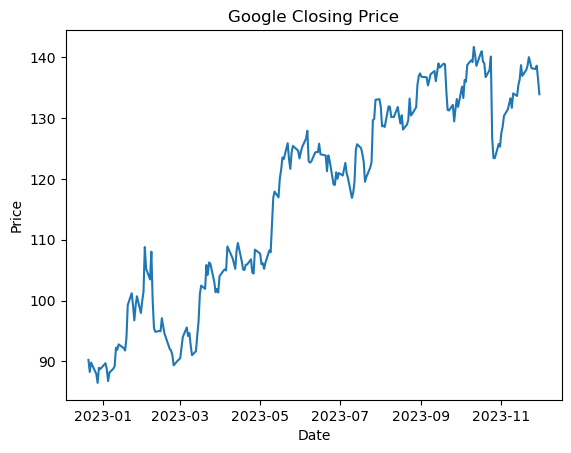

In [6]:
plt.plot(data['Close'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Closing Price")

In [7]:
data.reset_index(inplace=True)
data = data.Close

In [8]:
data = pd.DataFrame(data)
data

,Close
0,90.250000
1,88.260002
2,89.809998
3,87.930000
4,86.459999
...,...
232,138.220001
233,138.050003
234,138.619995
235,136.399994


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
data_scaled = scaler.fit_transform(data)

In [11]:
data_scaled

array([[-1.6189827 ],
       [-1.73836441],
       [-1.64537883],
       [-1.7581615 ],
       [-1.84634815],
       [-1.69697102],
       [-1.71016862],
       [-1.65197787],
       [-1.7113687 ],
       [-1.82775113],
       [-1.7443634 ],
       [-1.70596928],
       [-1.67957361],
       [-1.49840093],
       [-1.51939764],
       [-1.4660058 ],
       [-1.50439992],
       [-1.52719675],
       [-1.3994159 ],
       [-1.07726523],
       [-0.96148283],
       [-1.08146457],
       [-1.23024167],
       [-1.08446384],
       [-0.99147827],
       [-1.1570532 ],
       [-1.04187038],
       [-0.94828477],
       [-0.5061519 ],
       [-0.72091932],
       [-0.82590334],
       [-0.55174509],
       [-1.03407173],
       [-1.30643033],
       [-1.34242476],
       [-1.33402608],
       [-1.3370258 ],
       [-1.20804534],
       [-1.28723327],
       [-1.35862255],
       [-1.51099896],
       [-1.52599667],
       [-1.56979021],
       [-1.67297458],
       [-1.62798143],
       [-1

In [12]:
data_scaled.shape[0]

237

In [13]:
x = []
y = []

for i in range(100 , data_scaled.shape[0]):
    x.append(data_scaled[i-100 : i])
    y.append(data_scaled[i,0])
    
x, y = np.array(x), np.array(y)

In [14]:
x

array([[[-1.6189827 ],
        [-1.73836441],
        [-1.64537883],
        ...,
        [ 0.04096453],
        [-0.01662665],
        [ 0.17114461]],

       [[-1.73836441],
        [-1.64537883],
        [-1.7581615 ],
        ...,
        [-0.01662665],
        [ 0.17114461],
        [ 0.25453234]],

       [[-1.64537883],
        [-1.7581615 ],
        [-1.84634815],
        ...,
        [ 0.17114461],
        [ 0.25453234],
        [ 0.37691331]],

       ...,

       [[ 0.17414433],
        [-0.02202561],
        [ 0.0283665 ],
        ...,
        [ 1.3667631 ],
        [ 1.25877935],
        [ 1.24858102]],

       [[-0.02202561],
        [ 0.0283665 ],
        [ 0.14294928],
        ...,
        [ 1.25877935],
        [ 1.24858102],
        [ 1.28277534]],

       [[ 0.0283665 ],
        [ 0.14294928],
        [ 0.45550166],
        ...,
        [ 1.24858102],
        [ 1.28277534],
        [ 1.14959553]]])

In [15]:
y

array([ 0.25453234,  0.37691331,  0.36071597,  0.51789221,  0.36311566,
        0.26413064,  0.42670584,  0.49149609,  0.44410324,  0.36791504,
        0.42790591,  0.47949809,  0.56348494,  0.64027364,  0.34211895,
        0.32592116,  0.33791961,  0.42670584,  0.43150522,  0.42850549,
        0.51309283,  0.40930843,  0.3967104 ,  0.24133427,  0.39791048,
        0.34691787,  0.11115374,  0.10635482,  0.2305359 ,  0.16634569,
        0.22393686,  0.19934039,  0.32352147,  0.22153717,  0.17414433,
       -0.02202561,  0.0283665 ,  0.14294928,  0.45550166,  0.50769342,
        0.4692993 ,  0.4105085 ,  0.33252019,  0.13754987,  0.18434267,
        0.27852832,  0.33312023,  0.74525766,  0.75785523,  0.94622652,
        0.95222598,  0.87903704,  0.68406672,  0.69186583,  0.67806727,
        0.88203677,  0.87603732,  0.7746526 ,  0.77825282,  0.77585268,
        0.87543774,  0.78185213,  0.7122625 ,  0.79325054,  0.65227163,
        0.70146367,  0.74705732,  0.95822543,  0.79085039,  0.80

In [19]:
def run_simulation_with_model(x, y,prices,  amt, thresh, order, verbose=False, plot=True):
    curr_holding = False
    events_list = []
    init_amt = amt
    ticker_symbol = "GOOG"

    # Go through dates
    for i in range(1,len(x)):
        # If you're currently holding the stock, sell it
        if curr_holding:
            sell_price = prices[i]
            curr_holding = False
            ret = (sell_price - buy_price) / buy_price
            amt *= (1 + ret)
            events_list.append(('s', i,  ret))
            
            if verbose:
                print('Sold at $%s' % sell_price)
                print('Actual Return: %s' % (round(ret, 4)))
                print('=======================================')
            continue
        
        if order == "LSTM":
            try:
                pred =  model.predict(x[i:i+1])
            except:
                pred = thresh - 1

        # If you predict a high enough return and not holding, buy stock
        if (not curr_holding) and \
                ((pred[0][0] - y[i-1] > thresh)):

            curr_holding = True
            buy_price = prices[i]
            events_list.append(('b', i))
            if verbose:
                print('Bought at $%s' % buy_price)

    if verbose:
        print('Total Amount: $%s' % round(amt, 2))

    # Graph
    if plot:
        plt.figure(figsize=(10, 4))
        plt.plot(prices[14:])

        y_lims = (int(prices.min() * 0.95), int(prices.max() * 1.05))
        shaded_y_lims = int(prices.min() * 0.5), int(prices.max() * 1.5)

        for idx, event in enumerate(events_list):
            plt.axvline(event[1], color='k', linestyle='--', alpha=0.4)
            if event[0] == 's':
                color = 'green' if event[2] > 0 else 'red'
                plt.fill_betweenx(range(*shaded_y_lims),
                                  event[1], events_list[idx - 1][1], color=color, alpha=0.1)

        tot_return = np.round(100 * (amt / init_amt - 1), 2)
        tot_return = str(tot_return) + '%'
        plt.title("%s Price Data\nThresh=%s\nTotal Amt: $%s\nTotal Return: %s" % (
        ticker_symbol, thresh, np.round(amt, 2), tot_return), fontsize=20)
        plt.ylim(*y_lims)
        plt.show()

    return amt


In [20]:
scaled_prices = y
prices = scaler.inverse_transform(scaled_prices.reshape(len(y) , 1))
prices.shape

(137, 1)

1/1 [==============================] - 0s 125ms/step


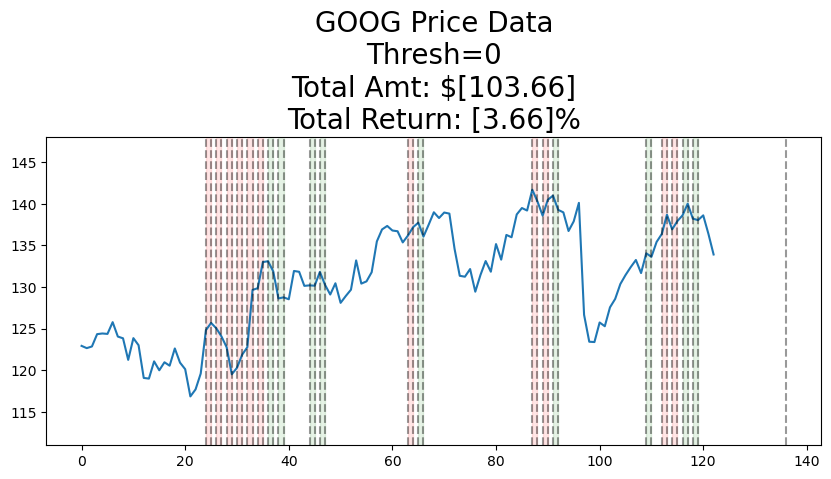

array([103.66051774])

In [21]:
run_simulation_with_model(x, y,prices,100, 0,"LSTM", verbose=False, plot=True)

1/1 [==============================] - 0s 132ms/step


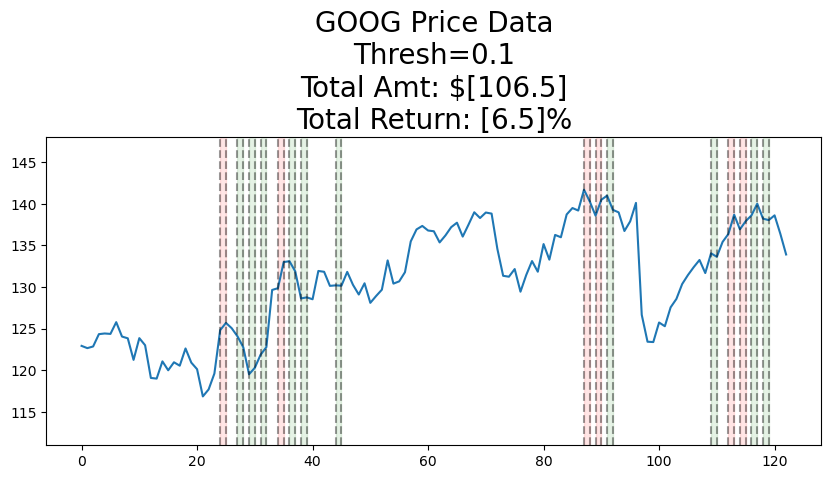

array([106.49734193])

In [23]:
run_simulation_with_model(x, y,prices,100, 0.1,"LSTM", verbose=False, plot=True)